In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
cd drive/MyDrive/Colab Notebooks/01.luanvan/01intentBDS


[Errno 2] No such file or directory: 'drive/MyDrive/Colab Notebooks/01.luanvan/01intentBDS'
/content/drive/MyDrive/Colab Notebooks/01.luanvan/01intentBDS


In [3]:
ls

'Bản sao của vi.23.text_classification_50k_OneVsOneClassifierr + LinearSVC.ipynb'
 data/
 en.06.GoogleNews-vectors-negative300.bin.gz
 model-train/
 vi.01.text_classification_naive_bayes
 vi.02.text_classification_vietnam
 vi.03.1.text_classification_vietnam
 vi.03.2.text_classification_Doc2vec-LogisticRegression
 vi.03.4.text_classification_vietnam_Word2vec-LogisticRegression
'vi.03.5.text_classification_vietnam_BERT Sci-kit Transformer'
 vi.03.5.text_classification_vietnam_Word2vec-phobert
'vi.03.6.text_classification_vietnam_BERT Sci-kit Transformer'
 vi.03.text_classification_vietnam
 vi.04.text_classification_SGDClassifier
 vi.05.text_classification_vietnam_fasttext
 vi.06.ML4U_QA_embed.txt
 vi.06.text_classification_vietnam_Word2vec-LogisticRegression
 vi.07.text_classification_Doc2vec-LogisticRegression
 vi.08.text_classification_vietnam_BOW-with-keras-LogisticRegression
 vi.09.stopwords.vietnamese.txt
 vi.09.text_classification_Text-Processing-LogisticRegression
 vi.10.stopwo

# 1.Text Processing (Đọc dữ liệu)

In [6]:
# import mongo and pandas
import numpy as np
import pandas as pd
#
import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import time

# Chia tập train/test
from sklearn.model_selection import train_test_split

import os
from sklearn import utils
import re

In [7]:
df = pd.read_csv('data/intentbdstrain.10k.csv')
#df = df[pd.notnull(df['tags'])]
df.head(10)

,text,intent
0,muốn thuê căn hộ ở huyện Ba Vì có phòng ngủ gi...,real_estate
1,cần mua đất ở quận Hoàng Mai có giấy tờ không ...,real_estate
2,Tôi muốn tìm đất ở quận Phú Nhuận giá khoảng 2...,real_estate
3,cần thuê phòng trọ ở huyện Thanh Trì có giấy t...,real_estate
4,cần tìm nhà xưởng có hợp đồng mua bán diện tíc...,real_estate
5,muốn tìm văn phòng ở huyện Mê Linh có 1 tầng d...,real_estate
6,Mình muốn mua nhà có giấy tờ hợp lệ có văn phòng,real_estate
7,Tui muốn thuê văn phòng diện tích khoảng 30 m2,real_estate
8,Tôi cần thuê văn phòng ở huyện Sóc Sơn có hợp ...,real_estate
9,muốn mua nhà xưởng có giấy phép xây dựng diện ...,real_estate


In [8]:
df.count()

text      5000
intent    5000
dtype: int64

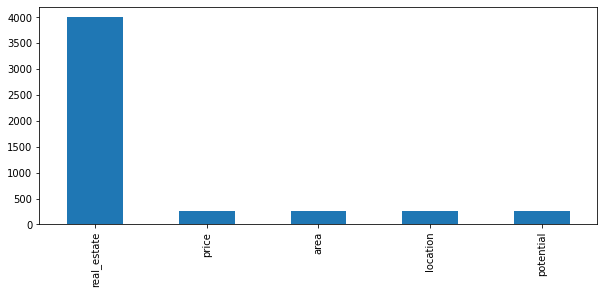

In [9]:
my_tags = ['area','price','location','potential','real_estate']
plt.figure(figsize=(10,4))
df.intent.value_counts().plot(kind='bar')

## Cài đặt underthesea

In [10]:
!pip install underthesea

     |████████████████████████████████| 7.6 MB 4.1 MB/s 
     |████████████████████████████████| 235 kB 49.5 MB/s 
     |████████████████████████████████| 743 kB 49.1 MB/s 
     |████████████████████████████████| 581 kB 55.4 MB/s 


In [11]:
from underthesea import word_tokenize

def w2v_tokenize_text(text):
    
    return word_tokenize(text, format="text")

df['text'] = df['text'].apply(w2v_tokenize_text)  

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(df.text, df.intent, random_state=0, test_size=0.3)
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

y_train_encoder = label_encoder.transform(y_train)
y_test_encoder = label_encoder.transform(y_test)

In [13]:
print(X_test)
print(type(X_test))
print(X_test.dtypes)

398     Mình muốn thuê nhà có giấy_tờ không xác_định c...
3833    Tui cần mua nhà ở quận Hoàn_Kiếm diện_tích kho...
4836              đất ở huyện Ba_Vì có sổ hồng mục_đích ?
4572                   muốn thuê nhà_xưởng nằm ở vị_trí ?
636     cần thuê nhà_xưởng ở quận Hoàng_Mai có giấy_tờ...
                              ...                        
4554    muốn thuê nhà có 2 tầng có giấy_tờ không xác_đ...
4807          nhà ở quận Thanh_Xuân có sổ hồng khả_năng ?
1073    muốn tìm phòng trọ ở huyện Nhà_Bè có sổ hồng g...
2906    muốn mua căn_hộ có 2 tầng có nhà_vệ_sinh giá k...
1357    cần thuê phòng trọ có 3 tầng có giấy_tờ không ...
Name: text, Length: 1500, dtype: object
<class 'pandas.core.series.Series'>
object


# 3. Embedding

In [14]:
MODEL_PATH = "model-train/"
FILE_NAME = "vi.22.10k.OneVsRestClassifier.pkl"



# 4.OneVsRestClassifier +

In [15]:
from sklearn import tree
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 



pipe = Pipeline([('count', CountVectorizer()),
    ('tfid', TfidfTransformer())]).fit(X_train)


X_train2= pipe.transform(X_train) 
X_train2

text_clf = OneVsRestClassifier(LinearSVC(random_state=0))

text_clf.fit(X_train2.toarray(), y_train_encoder)


X_test2= pipe.transform(X_test) 
X_test2

predicted = text_clf.predict(X_test2.toarray())
 
predicted
print('accuracy %s' % accuracy_score(y_test_encoder, predicted))
print(classification_report(y_test_encoder, predicted))



accuracy 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        76
           1       1.00      1.00      1.00        86
           2       1.00      1.00      1.00        67
           3       1.00      1.00      1.00        95
           4       1.00      1.00      1.00      1176

    accuracy                           1.00      1500
   macro avg       1.00      1.00      1.00      1500
weighted avg       1.00      1.00      1.00      1500



In [16]:
# Save model
pickle.dump(text_clf, open( os.path.join(MODEL_PATH,FILE_NAME), 'wb'))

#  Đối chiếu dữ liệu

In [18]:
my_array = np.array(X_test.to_numpy())
datashow = pd.DataFrame(my_array, columns = ['X_test'])
#
my_array = np.array(y_test.to_numpy())
datashow['y_test'] = pd.DataFrame(my_array, columns = ['y_test'])
#
my_array = np.array(y_test_encoder)
datashow['y_test_encoder']  = pd.DataFrame(my_array, columns = ['y_test_encoder'])
#
predicted_text = label_encoder.inverse_transform(predicted)
my_array = np.array(predicted_text)
datashow['predicted_text'] = pd.DataFrame(my_array, columns = ['predicted_text'])
#
my_array = np.array(predicted)
datashow['predicted'] = pd.DataFrame(my_array, columns = ['predicted'])

In [19]:
datashow

,X_test,y_test,y_test_encoder,predicted_text,predicted
0,Mình muốn thuê nhà có giấy_tờ không xác_định c...,real_estate,4,real_estate,4
1,Tui cần mua nhà ở quận Hoàn_Kiếm diện_tích kho...,real_estate,4,real_estate,4
2,đất ở huyện Ba_Vì có sổ hồng mục_đích ?,potential,2,potential,2
3,muốn thuê nhà_xưởng nằm ở vị_trí ?,location,1,location,1
4,cần thuê nhà_xưởng ở quận Hoàng_Mai có giấy_tờ...,real_estate,4,real_estate,4
...,...,...,...,...,...
1495,muốn thuê nhà có 2 tầng có giấy_tờ không xác_đ...,location,1,location,1
1496,nhà ở quận Thanh_Xuân có sổ hồng khả_năng ?,potential,2,potential,2
1497,muốn tìm phòng trọ ở huyện Nhà_Bè có sổ hồng g...,real_estate,4,real_estate,4
1498,muốn mua căn_hộ có 2 tầng có nhà_vệ_sinh giá k...,real_estate,4,real_estate,4
